<a href="https://colab.research.google.com/github/emadatifsd-jpg/Stack-Overflow-Developer-Survey-Analysis-2024/blob/main/2_Loading_and_Plotting_Data_in_Python_Pre_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
## Run this cell if you are running your notebook in Google Colab!
## Make sure the data for this lesson is in the folder 'Digital Transformation Notebooks/Data'
## OR, change the location to the appropriate folder in your drive

## mount google colab
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My Drive/Digital Transformation Notebooks/Data

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[Errno 2] No such file or directory: '/content/gdrive/My Drive/Digital Transformation Notebooks/Data'
/content


# Plotting Data in Python

In this notebook, we will learn to load a data file and visualize it in Python, using the `pandas` and  `matplotlib` libraries. This will be a starting point for most of our data analyses going forward - looking at the data in tabular and graphical form before you begin modelling will give you many clues about the relationships present in the data and potential modeling pitfalls.

First, we will want to load our `pandas` and  `matplotlib` packages. `pandas`handles the reading of tabular files and manipulation of this data, and  `matplotlib` handles plotting. Run the cell below to load these packages.  

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Next, we want to load our data file into a variable, which we will call `airfare_dataframe`. This is the data on airline fares data you saw in the previous lesson. Our data file, `linreg_airfare_univariate.csv` is a file with headers, where columns are seperated by columns and rows are seperated by new lines. The `read_csv` function takes care of reading the file and storing it as a Data Frame, a spreadsheet-like object that we can manipulate. Calling the `.head()` function associated with this object displays the first 5 rows of this data frame.

In [22]:
!pip install gdown
!gdown --id 1-Rno1NlyxErIvUEGoXICjJy8wBW56WA0
import pandas as pd
df = pd.read_csv('linreg_airfare_univariate.csv')
df.head()


/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-Rno1NlyxErIvUEGoXICjJy8wBW56WA0
To: /content/Copy of _03af4e71f0e048d18f98263d816864f1_linreg_airfare_univariate.csv
100% 98.0/98.0 [00:00<00:00, 334kB/s]


FileNotFoundError: [Errno 2] No such file or directory: 'linreg_airfare_univariate.csv'

Note that the two columns are the distance flown and the fare for each flight, where each flight is represented by a row. We can see how many total rows and columns the dataframe has by looking at the `shape` attribute of the Dataframe, as follows:

In [27]:
airfare_dataframe = df


In [25]:
import pandas as pd

# اسم الملف اللي تم تحميله فعليًا
file_path = '/content/Copy of _03af4e71f0e048d18f98263d816864f1_linreg_airfare_univariate.csv'

# تحميل الملف في DataFrame
df = pd.read_csv(file_path)

# عرض أول 5 صفوف
df.head()


,Distance,Fare
0,314,291
1,454,390
2,578,406
3,656,332
4,822,475


So, the dataframe has 10 rows (flights), and two columns. This is a small enough set of data that we can easily look at the entire set in tabular form. We can do this by passing 10 to the `.head()` function, to look at the first 10 rows:


In [28]:
airfare_dataframe.head(10)

,Distance,Fare
0,314,291
1,454,390
2,578,406
3,656,332
4,822,475
5,913,539
6,1024,501
7,1285,637
8,1675,744
9,2061,732


Just looking at the data in tabular form, do you notice any patterns in the relationship between distance and fare? Are these what you would expect?


We can also extract individual columns from the dataframe by specifying the column name. To just look at fare, we can pass the column name in brackets. So, to extract just the fare from the dataframe into a variable, we can write the following:

In [30]:
fare = airfare_dataframe['Fare']

We can also extract invididual cells from the data frame using the `.iloc[row,column]` syntax. Remember that Python starts its indices at zero. So:

In [31]:
airfare_dataframe.iloc[0,0]

np.int64(314)

Gets us the first row and column. To get the first 3 rows in the first column:

In [32]:
airfare_dataframe.iloc[0:3,0]

,Distance
0,314
1,454
2,578


We can perform operations on this column, such as computing the average fare across the whole data set:

In [33]:
fare.mean()

np.float64(504.7)

Now, let's plot the data, with distance on the x-axis and fare on the y-axis, to get more insight on this relationship. The `plt.scatter` function takes an array of data for the x-axis, a corresponding array of data for the y-axis, and any additional details we want to specify for our graph, and creates a scatter plot of the data. We will pass our Distance column as the x-axis, our Fare column to the y-axis, and for additional details, we will set the color of the scatter points to be blue.

Additionally, we specify a title and x- and y-axis labels for the plot.

Text(0, 0.5, 'Fare ($)')

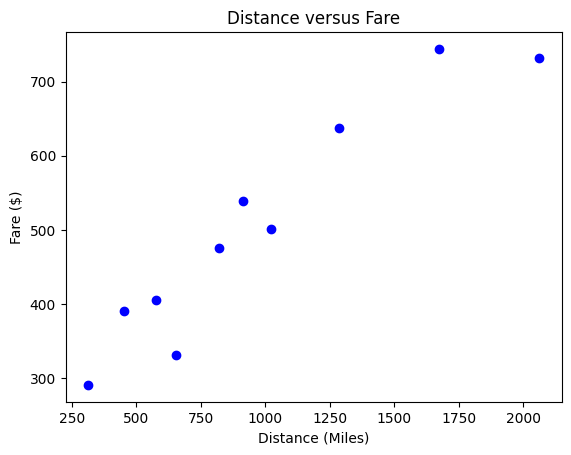

In [34]:
#plot raw data
plt.scatter(x=airfare_dataframe['Distance'], y=airfare_dataframe['Fare'],color="blue")
plt.title('Distance versus Fare')
plt.xlabel('Distance (Miles)')
plt.ylabel('Fare ($)')

We can now see what looks like a fairly strong relationship between Distance and Fare: as distance increases, fare generally seems to increase. This might match your intuition: longer flights mean higher fuel costs, more employee time, etc. - so you might expect them to be more expensive!

### Plotting Functions

Let's try one more graphing exercise: plotting continuous functions. This will be very useful when we try to predict the fare for a distance we don't have in our data set, and for checking how well our machine learning models fit our data.  Let's assume there is some underlying mathematical relationship between distance and fare, so that if some one gives us a distance, we can compute a corresponding fare.

Of course, there are many factors that go into fares besides distance (how early the flight is booked, whether you are in first class or economy, etc.) but an approximation might get us pretty far. For now, we will just eyeball the data (we will learn better ways to "guess" this function soon). What if we just said that the fare (in dollars) will be half the distance travelled (in miles)? In other words, if $y$ is fare and $x$ is distance, then $y=\frac{1}{2}x$. This underestimates fares for the lowest distances in our data, and overestimates it for the highest distances, but how well or poorly does this fit overall?

Let's add a red line to indicate this function on the plot above. We will do this by choosing a large number of evenly spaced distance values as our $x$ values, and the $y$ values will be half of the corresponding x-values. Using the `np.arange` function, we have as follows:

In [35]:
import numpy as np
x = np.arange(start=250, stop=2000, step=1)

You could also generate `x` using the following syntax:


In [36]:
x = np.array(range(250,2000))

Then, create $y$:

In [37]:
y = .5*x

Now, we repeat the code for the previous scatterplot, but now add a new line at the end to plot the function, choosing the line color to be red:

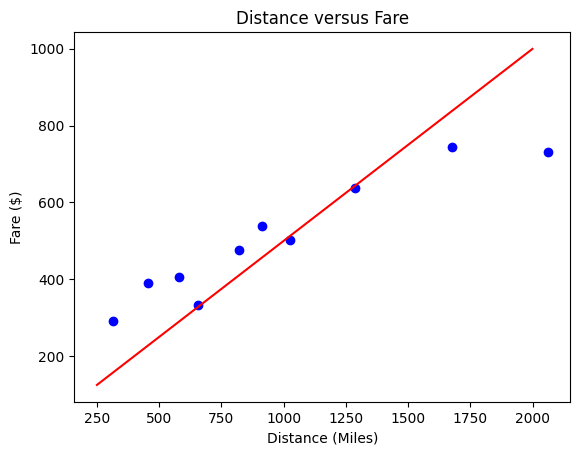

In [38]:
#plot raw data
plt.scatter(x=airfare_dataframe['Distance'], y=airfare_dataframe['Fare'],color="blue")
plt.title('Distance versus Fare')
plt.xlabel('Distance (Miles)')
plt.ylabel('Fare ($)')
# NEW: add linear function y=.5x
plt.plot(x,y,color="red")

We now can see how our red function matches against the data: not bad for an eye-balled guess. We will soon see how to improve this guess.